Utilizando a base de clusterização encontrada nesse link (https://drive.google.com/file/d/1_702eOQbimT1HhTuozwMEKV6HHOykLaJ/view), execute os algoritmos de clusterização citados a seguir e compare os resultados.


* Execute os algoritmos de agrupamento K-means e Hierárquico com os seguintes valores de K: 2, 5, 10 e 100. Compare os agrupamento resultantes dos 2 algoritmos.
* Escolha um número fixo de K e altere o parâmetro do K-Means referente ao número máximo de iterações: 1, 10 e 100 e o parâmetro de Linkage do Hierárquico, quais diferenças puderam ser observadas?
* Faça uma comparação entre os 2 algoritmos, qual você acha que teve o melhor desempenho e por quê?

_Bônus_ : normalizar os dados e executar novamente os algoritmos para analisar os
novos resultados gerados. Em seguida, fazer os gráficos dos agrupamentos dos dados
brutos vs dados normalizados, e um boxplot para mostrar a dispersão destes dados.

In [1]:
import scipy.io.arff as io
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13

# Read arff data
with open("Genes_Atividade_IA.arff") as f:
    values = io.loadarff(f)
    f.close()
    
dataset = pd.DataFrame(data=values[0])
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 20].values

<Figure size 1224x753.231 with 0 Axes>

In [2]:
print(pd.options.display.max_columns, pd.options.display.max_rows)
pd.options.display.max_columns = 50
#pd.options.display.max_rows =  
dataset.describe()

20 60


,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.040157,41.486336,51.338392,52.555181,48.932735,53.852077,45.797667,40.663197,39.632611,52.066032,41.493874,53.691974,57.023709,21.915492,27.728612,35.790131,54.864549,54.294117,35.087462,52.105545,46.389605,42.376928,27.628763,22.053380,35.257338,43.396844,52.185982,56.164531,37.587312,44.472439,72.736881,46.143284
std,195.264717,181.466441,210.726346,252.295704,221.732356,393.758129,123.183344,157.028175,185.991398,186.169270,139.247221,261.725555,314.203534,116.726607,136.411996,336.523288,277.654367,277.993904,1108.114405,242.242244,241.613858,165.470468,308.543568,208.651352,95.223057,193.638153,233.848790,347.561819,207.009834,114.878046,742.846516,222.768691
min,0.000003,0.000003,0.000004,0.000004,0.000004,0.000003,0.000004,0.000003,0.000003,0.000004,0.000004,0.000004,0.000004,0.000002,0.000002,0.000003,0.000004,0.000004,0.000002,0.000004,0.000004,0.000003,0.000003,0.000002,0.000003,0.000003,0.000004,0.000004,0.000003,0.000003,0.000005,0.000003
25%,3.173068,3.105311,3.140023,7.117802,7.087438,1.257345,7.631545,3.071134,2.765053,7.428423,3.506638,7.896982,8.147757,1.569051,2.492157,1.170095,7.812597,3.751913,0.602562,4.128284,7.150531,3.094211,2.414023,0.427236,3.304699,5.983976,4.248427,3.678518,5.874027,6.997996,4.580134,3.174720
50%,12.692271,15.526556,19.625143,21.353406,21.262314,9.430086,19.078863,15.355670,13.825265,21.224067,14.026553,23.690945,20.369393,6.724503,9.968628,5.850474,23.437791,18.759564,2.008539,20.641418,17.876327,15.471057,8.046744,2.136179,16.523495,14.959941,21.242137,22.071107,14.685068,20.993988,22.900670,15.873599
75%,31.730678,34.158423,43.175314,46.265713,42.524627,34.576981,41.973499,33.782474,30.415583,50.937760,35.066382,47.381890,48.886544,15.690507,24.921571,17.551423,46.875582,48.774865,6.025616,45.411120,42.903184,34.036326,18.775735,8.544717,36.351689,32.911870,42.484273,47.820732,29.370135,45.486973,54.961609,38.096639
max,7377.382624,5216.922745,4827.785071,7644.519332,7548.121360,12623.741610,2663.409328,3528.732999,5275.721159,6460.605882,3857.301972,9733.029992,12201.266550,4512.141526,5587.416115,13058.258680,9707.151804,7931.543465,48970.179710,9032.684565,9585.286431,3945.119614,13529.258260,7732.968610,1939.858329,5032.524122,8322.669088,12036.110500,7486.447452,2554.268510,32253.304180,6231.975147


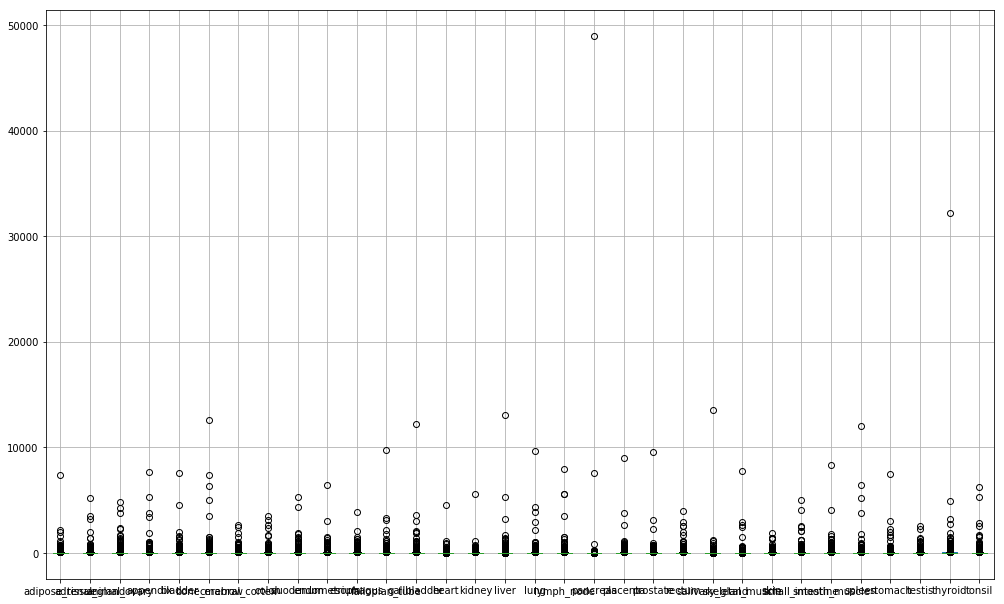

In [3]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
dataset.boxplot()

In [4]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(dataset[dataset.columns[:-1]])

In [5]:
import numpy as np
a = np.array(dataset[dataset.columns[:-1]])

In [6]:
df = pd.DataFrame(transformer.transform(a))

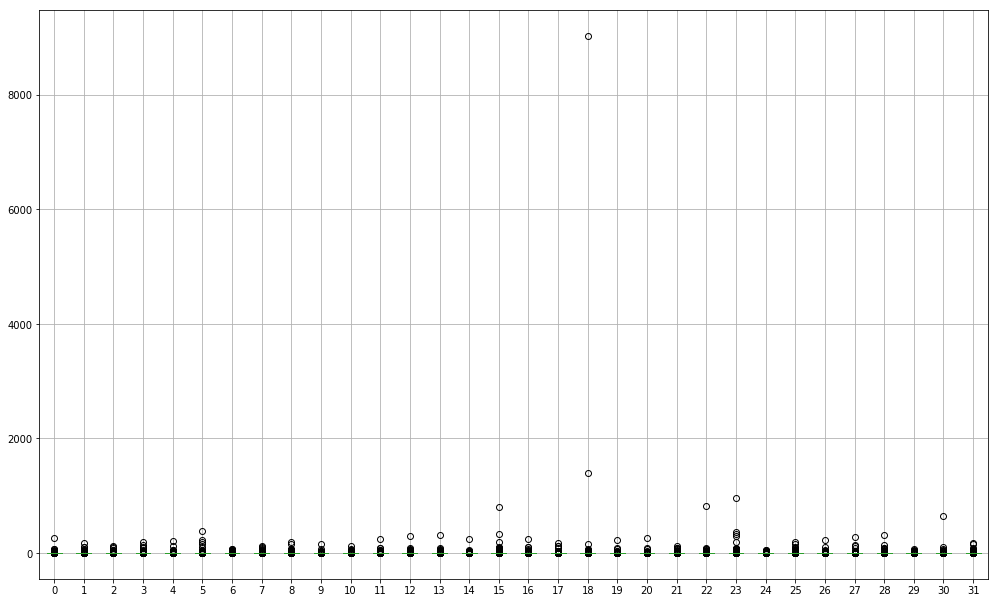

In [7]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
df.boxplot()

a = (df[18] > 8000)

df[df.iloc[:,18] >= 8000]

df[df.iloc[:,18] >= 8000][18]

df[18].median()

df[18] = df[18].replace(9029.629629, 0.0)

df.loc[df[18] >= 9000]

df[18][1940]

In [8]:
a = df.loc[df[18] > 9000]

In [9]:
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
1940,-0.377778,-0.5,0.490196,-0.5,-0.59,-0.283019,-0.555555,-0.49,0.2,-0.478049,-0.444444,-0.58,-0.5,0.15873,-0.444444,-0.357143,-0.58,-0.408333,9029.629629,0.4,-0.49,-0.5,0.655738,-0.236842,-0.45,-0.111111,-0.544444,-0.416667,-0.375,-0.472727,-0.454545,-0.454545


In [10]:
aux = np.array(df[18])

In [11]:
df[18] = df[18].replace(9029.629629, np.nanmedian(aux))

In [12]:
df.loc[df[18] > 9000]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
1940,-0.377778,-0.5,0.490196,-0.5,-0.59,-0.283019,-0.555555,-0.49,0.2,-0.478049,-0.444444,-0.58,-0.5,0.15873,-0.444444,-0.357143,-0.58,-0.408333,9029.629629,0.4,-0.49,-0.5,0.655738,-0.236842,-0.45,-0.111111,-0.544444,-0.416667,-0.375,-0.472727,-0.454545,-0.454545


# Identificando o numero de classes

In [13]:
class_array = dataset.iloc[:, 32]

In [14]:
class_array.describe()

count                   2000
unique                  2000
top       b'ENSG00000073146'
freq                       1
Name: class, dtype: object

In [15]:
a = np.array(class_array.value_counts())

In [16]:
a.sum()

2000

Significa que existe 2000 classes, uma para cada instância, mas será que elas não estão relacionadas?

# Processamento de dados acaba aqui

Execute os algoritmos de agrupamento K-means e Hierárquico com os seguintes valores de K: 2, 5, 10 e 100. Compare os agrupamento resultantes dos 2 algoritmos.

Do exemplo abaixo temos:
```python
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [4, 4]])

kmeans.cluster_centers_
```

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 32].values

In [18]:
X

array([[ 31.73067795,  27.94780042, 109.9007984 , ...,  66.48096122,
         59.54174302,  15.87359946],
       [ 22.21147457,   0.62106223,   7.85005703, ...,   0.3498998 ,
          0.45801341,   0.31747199],
       [ 79.32669489, 124.2124463 , 102.0507413 , ..., 129.4629245 ,
        160.3046927 , 117.464636  ],
       ...,
       [ 60.28828811,  31.05311157,  27.47519959, ...,  20.99398775,
         54.96160894,  44.44607848],
       [ 12.69227118,  18.63186694,  23.55017108, ...,  45.48697347,
         27.48080447,  15.87359946],
       [ 22.21147457,  24.84248926,  39.25028513, ...,  31.49098163,
         41.2212067 ,  19.04831935]])

In [19]:
y

array([b'ENSG00000000003', b'ENSG00000000005', b'ENSG00000000419', ...,
       b'ENSG00000093144', b'ENSG00000093167', b'ENSG00000093183'],
      dtype=object)

## K = 2

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [21]:
a = np.array(kmeans.labels_)
a.sum()

1

Perceba que a soma deu 1 por causa que o outlier na coluna ```"pancreas"``` causou um desequilibrio nas classes

In [22]:
kmeans.cluster_centers_[0]

array([39.05873463, 41.50708976, 51.34443912, 52.58058144, 48.95703592,
       53.87901696, 45.82057733, 40.68338489, 39.64275479, 52.09186528,
       41.51463154, 53.7184383 , 57.05223534, 21.9219698 , 27.74248304,
       35.80803475, 54.89160398, 54.32108966, 10.60767637, 52.11302411,
       46.41263207, 42.39812701, 27.63319137, 22.06430544, 35.27414936,
       43.41256626, 52.21187541, 56.19078705, 37.60317633, 44.49328609,
       72.77326733, 46.16636715])

In [23]:
kmeans.cluster_centers_[1]

array([1.90384068e+00, 3.10531000e-06, 3.92502851e+01, 1.77945050e+00,
       3.54371895e-01, 3.14336000e-06, 3.81577000e-06, 3.07113403e-01,
       1.93553711e+01, 4.24481333e-01, 3.50664000e-06, 7.89698174e-01,
       4.07388000e-06, 8.96600403e+00, 2.49216000e-06, 2.92524000e-06,
       7.81259703e-01, 3.75191271e-01, 4.89701797e+04, 3.71545526e+01,
       3.57526536e-01, 3.09421000e-06, 1.87757351e+01, 2.13617917e-01,
       1.65234951e+00, 1.19679527e+01, 4.24842730e-01, 3.67851788e+00,
       5.87402703e+00, 2.79919837e+00, 4.58013000e-06, 3.17472000e-06])

Tanto que é possivel ver que ele foi capturado no ```kmeans.cluster_centers_[1]``` (valor 4.89e+4)

Adicionando a coluna calculada ```kmeans.label_``` no conjunto de dados

In [24]:
dataset["K-classes"] = kmeans.labels_

In [25]:
dataset.loc[ dataset["pancreas"] > 40000]

,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil,class,K-classes
1940,1.903841,0.000003,39.250285,1.77945,0.354372,0.000003,0.000004,0.307113,19.355371,0.424481,0.000004,0.789698,0.000004,8.966004,0.000002,0.000003,0.78126,0.375191,48970.17971,37.154553,0.357527,0.000003,18.775735,0.213618,1.65235,11.967953,0.424843,3.678518,5.874027,2.799198,0.000005,0.000003,b'ENSG00000091704',1


Provado que a única instância da classe 1 contém o valor com outlier, ou seja, o outilier interfere bastante na análise de dados.

## K = 3

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [45]:
a = np.array(kmeans.labels_)

Analisando os _labels_ de saida do algorítimo, temos 3 classes, tais que a 1 continua como o desequilibrio da coluna ```"pancreas"```

In [56]:
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 1993, 1: 1, 2: 6}

|Classe|Nº instancias|
|-|-|
|0|1993|
|1|1|
|2|6|

In [22]:
kmeans.cluster_centers_[0]

array([39.05873463, 41.50708976, 51.34443912, 52.58058144, 48.95703592,
       53.87901696, 45.82057733, 40.68338489, 39.64275479, 52.09186528,
       41.51463154, 53.7184383 , 57.05223534, 21.9219698 , 27.74248304,
       35.80803475, 54.89160398, 54.32108966, 10.60767637, 52.11302411,
       46.41263207, 42.39812701, 27.63319137, 22.06430544, 35.27414936,
       43.41256626, 52.21187541, 56.19078705, 37.60317633, 44.49328609,
       72.77326733, 46.16636715])

In [23]:
kmeans.cluster_centers_[1]

array([1.90384068e+00, 3.10531000e-06, 3.92502851e+01, 1.77945050e+00,
       3.54371895e-01, 3.14336000e-06, 3.81577000e-06, 3.07113403e-01,
       1.93553711e+01, 4.24481333e-01, 3.50664000e-06, 7.89698174e-01,
       4.07388000e-06, 8.96600403e+00, 2.49216000e-06, 2.92524000e-06,
       7.81259703e-01, 3.75191271e-01, 4.89701797e+04, 3.71545526e+01,
       3.57526536e-01, 3.09421000e-06, 1.87757351e+01, 2.13617917e-01,
       1.65234951e+00, 1.19679527e+01, 4.24842730e-01, 3.67851788e+00,
       5.87402703e+00, 2.79919837e+00, 4.58013000e-06, 3.17472000e-06])

Tanto que é possivel ver que ele foi capturado no ```kmeans.cluster_centers_[1]``` (valor 4.89e+4)

In [50]:
kmeans.cluster_centers_[2]

array([2032.40280731, 1053.52856536, 1945.50580017, 3675.8702052 ,
       2747.6815486 , 4100.09655448, 1250.36510991, 1717.32696332,
       2336.93064329, 1912.28840394, 1280.5658107 , 1574.85558306,
       3801.06457429,  362.00241265, 1228.42574787, 1295.39252222,
       3854.93068731, 4036.43275533,  211.56606665, 2665.56393001,
       1129.9030294 , 1777.16035312, 2789.76130629,  116.77779522,
        623.32131499, 2380.12659917, 2619.93431096, 4816.4673858 ,
       2672.19279766,  650.05550416, 6891.57507662, 3081.75351066])

Adicionando a coluna calculada ```kmeans.label_``` no conjunto de dados

In [24]:
dataset["K-classes"] = kmeans.labels_

In [25]:
dataset.loc[ dataset["pancreas"] > 40000]

,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil,class,K-classes
1940,1.903841,0.000003,39.250285,1.77945,0.354372,0.000003,0.000004,0.307113,19.355371,0.424481,0.000004,0.789698,0.000004,8.966004,0.000002,0.000003,0.78126,0.375191,48970.17971,37.154553,0.357527,0.000003,18.775735,0.213618,1.65235,11.967953,0.424843,3.678518,5.874027,2.799198,0.000005,0.000003,b'ENSG00000091704',1


Provado que a única instância da classe 1 contém o valor com outlier, ou seja, o outilier interfere bastante na análise de dados.

### Hierarquico

```python
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(X)
clustering 


clustering.labels_
```

In [26]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)

In [27]:
clustering 
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])